In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from xgboost import XGBClassifier

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(1001)

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Call.csv", encoding="latin-1")

In [2]:
# The distribution of the "Chrun"
df['Churn'].value_counts()

0    25719
1     4281
Name: Churn, dtype: int64

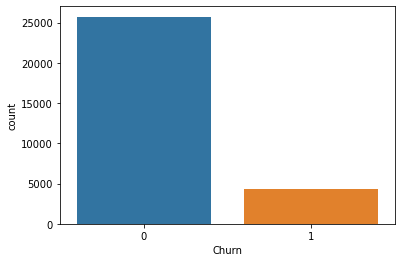

In [3]:
# "Churn" values given are ubalanced 
sns.countplot(df['Churn'])
plt.show()

In [4]:
print ("df Shape: ", df.shape)
#shuffle the rows as a precaution
df = df.sample(frac=1)

#Split the churn from the data frame
churn = np.array(df["Churn"])
df = df.drop(['Churn'],axis = 1)

train_x, test_x, train_y, test_y = train_test_split(df, churn, test_size = 0.2, random_state = 10)
#Let's look athe shape of the train and test splits
print ("Train_x Shape: ",train_x.shape)
print ("Train_y Shape: ", train_y.shape)
print ("Test_x Shape: ", test_x.shape)
print ("Test_y Shape: ", test_y.shape)

df Shape:  (30000, 14)
Train_x Shape:  (24000, 13)
Train_y Shape:  (24000,)
Test_x Shape:  (6000, 13)
Test_y Shape:  (6000,)


In [5]:
#As the given "Churn" data is unbalanced, we will be using SMOTE and pipelines to balance the data.
#And to prevent any data leakage the process of oversampling will be done inside each step of cross validation.

In [6]:
#Decision Tree Classifier
classifier = DecisionTreeClassifier()
pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('classifier', classifier)])
pipe.fit(train_x, train_y)
# cross validation using intra-fold sampling
cv_result = cross_validate(pipe, train_x, train_y,cv=5,scoring=('roc_auc','accuracy'))
test_roc_auc =cv_result['test_roc_auc']
test_accuracy =cv_result['test_accuracy']

#Print out Mean AUC and Accuracy score
print("Mean AUC Score - DTC: ", statistics.mean(test_roc_auc))
print("Mean Accuracy Score - DTC: ", statistics.mean(test_accuracy))


Mean AUC Score - DTC:  0.8811711048981726
Mean Accuracy Score - DTC:  0.922625


In [7]:
#Bagging Classifier
clf = DecisionTreeClassifier()
classifier = BaggingClassifier(base_estimator=clf, n_estimators=10, random_state=10)
pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('classifier', classifier)])
pipe.fit(train_x, train_y)
# cross validation using intra-fold sampling
cv_result = cross_validate(pipe, train_x, train_y,cv=5,scoring=('roc_auc','accuracy'))
test_roc_auc =cv_result['test_roc_auc']
test_accuracy =cv_result['test_accuracy']

#Print out Mean AUC and Accuracy score
print("Mean AUC Score - Bagging: ", statistics.mean(test_roc_auc))
print("Mean Accuracy Score - Bagging: ", statistics.mean(test_accuracy))

Mean AUC Score - Bagging:  0.9515436841902868
Mean Accuracy Score - Bagging:  0.9455833333333333


In [8]:
#Random Forest
classifier = RandomForestClassifier(n_estimators=100, max_features='sqrt')
pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('classifier', classifier)])
pipe.fit(train_x, train_y)
# cross validation using intra-fold sampling
cv_result = cross_validate(pipe, train_x, train_y,cv=5,scoring=('roc_auc','accuracy'))
test_roc_auc =cv_result['test_roc_auc']
test_accuracy =cv_result['test_accuracy']

#Print out Mean AUC and Accuracy score
print("Mean AUC Score - Random forest: ", statistics.mean(test_roc_auc))
print("Mean Accuracy Score - Random forest: ", statistics.mean(test_accuracy))

Mean AUC Score - Random forest:  0.9732998964562988
Mean Accuracy Score - Random forest:  0.953875


In [9]:
#Adaptive Boosting 
classifier = AdaBoostClassifier(n_estimators=10, random_state=10)
pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('classifier', classifier)])
pipe.fit(train_x, train_y)
# cross validation using intra-fold sampling
cv_result = cross_validate(pipe, train_x, train_y,cv=5,scoring=('roc_auc','accuracy'))
test_roc_auc =cv_result['test_roc_auc']
test_accuracy =cv_result['test_accuracy']

#Print out Mean AUC and Accuracy score
print("Mean AUC Score - Addapitve Boosting: ", statistics.mean(test_roc_auc))
print("Mean Accuracy Score - Addapitve Boosting: ", statistics.mean(test_accuracy))


Mean AUC Score - Addapitve Boosting:  0.6296281684443805
Mean Accuracy Score - Addapitve Boosting:  0.6022916666666667


In [10]:
#Gradient Boosting
classifier = GradientBoostingClassifier(n_estimators=10)
pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('classifier', classifier)])
pipe.fit(train_x, train_y)
# cross validation using intra-fold sampling
cv_result = cross_validate(pipe, train_x, train_y,cv=5,scoring=('roc_auc','accuracy'))
test_roc_auc =cv_result['test_roc_auc']
test_accuracy =cv_result['test_accuracy']

#Print out Mean AUC and Accuracy score
print("Mean AUC Score - Gradient Boosting: ", statistics.mean(test_roc_auc))
print("Mean Accuracy Score - Gradient Boosting: ", statistics.mean(test_accuracy))

Mean AUC Score - Gradient Boosting:  0.6598241537403203
Mean Accuracy Score - Gradient Boosting:  0.60075


In [11]:
############################################################################################################################################
#As the cross validated Random Forest model has given the best results, we will be focusing on improving on the model by using 
#different methods such as manual hyper parametric tuning, grid- search hyper parametric tuning and random- search hyper parametric tuning.
############################################################################################################################################

#We will recreate the model to have a baseline for the comparison between tuned models.

#Random Forest- B
classifier = RandomForestClassifier(n_estimators=100, max_features='sqrt')
pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('classifier', classifier)])
pipe.fit(train_x, train_y)
# cross validation using intra-fold sampling
cv_result = cross_validate(pipe, train_x, train_y,cv=5,scoring=('roc_auc','accuracy'))
test_roc_auc =cv_result['test_roc_auc']
test_accuracy =cv_result['test_accuracy']

#Print out Mean AUC and Accuracy score for the
print("Mean AUC Score - Random forest: ", statistics.mean(test_roc_auc))
print("Mean Accuracy Score - Random forest: ", statistics.mean(test_accuracy))
acc1 = statistics.mean(test_accuracy)

Mean AUC Score - Random forest:  0.9723020599072237
Mean Accuracy Score - Random forest:  0.9533333333333334


In [12]:
#Manual Hyper Parameter Tuning
classifier = RandomForestClassifier(n_estimators=50, max_features='sqrt')
pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('classifier', classifier)])
pipe.fit(train_x, train_y)
# cross validation using intra-fold sampling
cv_result = cross_validate(pipe, train_x, train_y,cv=5,scoring=('roc_auc','accuracy'))
test_roc_auc =cv_result['test_roc_auc']
test_accuracy =cv_result['test_accuracy']
acc2 = statistics.mean(test_accuracy)

#Print out Mean AUC and Accuracy score
print("Mean AUC Score - Random forest: ", statistics.mean(test_roc_auc))
print("Mean Accuracy Score - Random forest: ", statistics.mean(test_accuracy))


Mean AUC Score - Random forest:  0.9715303246315795
Mean Accuracy Score - Random forest:  0.9530833333333333


In [13]:
# Do grid search hyper parametric tuning for Random Forest to improve the model
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier())
])
param_grid = {
    "clf__n_estimators": [100, 500, 1000],
    "clf__max_depth": [1, 5, 10, 25],
    "clf__max_features": [*np.arange(0.1, 1.1, 0.1)],
}
gs = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1000)
gs.fit(train_x, train_y)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 3/3; 1/120] START clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=100
[CV 1/3; 2/120] START clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=500
[CV 2/3; 1/120] START clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=100
[CV 2/3; 2/120] START clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=500
[CV 1/3; 1/120] START clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=100
[CV 1/3; 3/120] START clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=1000
[CV 3/3; 2/120] START clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=500
[CV 2/3; 3/120] START clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=1000
[CV 3/3; 1/120] END clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=100;, score=0.858 total time=   0.4s
[CV 2/3; 1/120] END clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=100;, score=0.858 total time=   0.4s
[CV 1/3; 1/120] END clf

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [1, 5, 10, 25],
                         'clf__max_features': [0.1, 0.2, 0.30000000000000004,
                                               0.4, 0.5, 0.6,
                                               0.7000000000000001, 0.8, 0.9,
                                               1.0],
                         'clf__n_estimators': [100, 500, 1000]},
             verbose=1000)

In [14]:
#Calculate accuracy score for Grid Search optimized Random Forest model
predictionforest = gs.best_estimator_.predict(test_x)
print("Accuracy Score:", metrics.accuracy_score(test_y,predictionforest))
acc3 = metrics.accuracy_score(test_y,predictionforest)

Accuracy Score: 0.9686666666666667


In [15]:
# Do Randomized Search hyper parametric tuning for Random Forest to improve the model
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier())
])
param_grid = {
    "clf__n_estimators": [100, 500, 1000],
    "clf__max_depth": [1, 5, 10, 25],
    "clf__max_features": [*np.arange(0.1, 1.1, 0.1)],
}
rs = RandomizedSearchCV(pipe, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)
rs.fit(train_x, train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END clf__max_depth=1, clf__max_features=0.9, clf__n_estimators=1000; total time=   9.6s
[CV] END clf__max_depth=1, clf__max_features=0.9, clf__n_estimators=1000; total time=   9.6s
[CV] END clf__max_depth=1, clf__max_features=0.9, clf__n_estimators=1000; total time=   9.6s
[CV] END clf__max_depth=1, clf__max_features=0.9, clf__n_estimators=1000; total time=   9.6s
[CV] END clf__max_depth=1, clf__max_features=0.9, clf__n_estimators=1000; total time=  10.1s
[CV] END clf__max_depth=1, clf__max_features=0.9, clf__n_estimators=1000; total time=  10.1s
[CV] END clf__max_depth=1, clf__max_features=0.9, clf__n_estimators=1000; total time=  10.1s
[CV] END clf__max_depth=1, clf__max_features=0.9, clf__n_estimators=1000; total time=  10.2s
[CV] END clf__max_depth=1, clf__max_features=0.9, clf__n_estimators=1000; total time=  11.9s
[CV] END clf__max_depth=1, clf__max_features=0.9, clf__n_estimators=1000; total time=  11.9s
[CV] EN

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('clf',
                                              RandomForestClassifier())]),
                   n_jobs=4,
                   param_distributions={'clf__max_depth': [1, 5, 10, 25],
                                        'clf__max_features': [0.1, 0.2,
                                                              0.30000000000000004,
                                                              0.4, 0.5, 0.6,
                                                              0.7000000000000001,
                                                              0.8, 0.9, 1.0],
                                        'clf__n_estimators': [100, 500, 1000]},
                   verbose=2)

In [16]:
#Calculate accuracy score for Random Search optimized Random Forest model
predictionforest = rs.best_estimator_.predict(test_x)
print("Accuracy Score:", metrics.accuracy_score(test_y,predictionforest))
acc4 = metrics.accuracy_score(test_y,predictionforest)

Accuracy Score: 0.968


In [17]:
#Compare the accuracy results between the Base accuracy, Manual Search, Grid Search and Random Search
print('Base Accuracy vs Manual Search {:0.4f}%.'.format( 100 * (acc2 - acc1) / acc1))
print('Base Accuracy vs Grid Search {:0.4f}%.'.format( 100 * (acc3 - acc1) / acc1))
print('Base Accuracy vs Random Search {:0.4f}%.'.format( 100 * (acc4 - acc1) / acc1))

Base Accuracy vs Manual Search -0.0262%.
Base Accuracy vs Grid Search 1.6084%.
Base Accuracy vs Random Search 1.5385%.


In [18]:
#As the from the comparisons, we can evaluate that the Random Forest model which was optimized by Grid Search algorithm has performed the best
#with the test accuracy of 0.9698333333333333
print("Base Accuracy:",acc1)
print("Manual Search:",acc2)
print("Grid Accuracy:",acc3)
print("Random Accuracy:",acc4)

Base Accuracy: 0.9533333333333334
Manual Search: 0.9530833333333333
Grid Accuracy: 0.9686666666666667
Random Accuracy: 0.968
